In [ ]:
import pandas as pd

In [ ]:
import geopandas as gpd

In [ ]:
map_df = gpd.read_file("departements-20140306-50m.shp")

In [ ]:
map_df.head()

,code_insee,nom,nuts3,wikipedia,geometry
0,01,Ain,FR711,b'fr:Ain (d\xe9partement)',"POLYGON ((5.25559 45.78459, 5.23987 45.77758, ..."
1,02,Aisne,FR221,b'fr:Aisne (d\xe9partement)',"POLYGON ((3.48175 48.86640, 3.48647 48.85768, ..."
2,03,Allier,FR721,b'fr:Allier (d\xe9partement)',"POLYGON ((2.38613 46.33196, 2.38407 46.33112, ..."
3,04,Alpes-de-Haute-Provence,FR821,fr:Alpes-de-Haute-Provence,"POLYGON ((6.66579 43.83120, 6.67673 43.83178, ..."
4,05,Hautes-Alpes,FR822,fr:Hautes-Alpes,"POLYGON ((6.24158 44.44686, 6.24411 44.44693, ..."


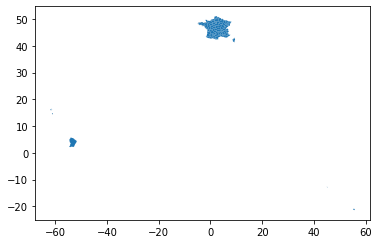

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
map_df.plot()

In [ ]:
map_df[map_df.code_insee.str.contains("\d\d\d")]

,code_insee,nom,nuts3,wikipedia,geometry
96,971,Guadeloupe,FR910,fr:Guadeloupe,"MULTIPOLYGON (((-61.61403 15.83955, -61.61399 ..."
97,972,Martinique,FR920,fr:Martinique,"MULTIPOLYGON (((-60.86880 14.39091, -60.86747 ..."
98,973,Guyane,FR930,fr:Guyane,"MULTIPOLYGON (((-52.58463 5.28309, -52.58316 5..."
99,974,b'La R\xe9union',FR940,b'fr:La R\xe9union',"MULTIPOLYGON (((55.77886 -21.36291, 55.77889 -..."
100,976,Mayotte,None,fr:Mayotte,"MULTIPOLYGON (((45.13667 -13.00398, 45.13859 -..."


In [ ]:
map_df = map_df[map_df.code_insee.str.contains("\d\d\d")==False]
#on enlève les DOM TOM 
#regex https://www.w3schools.com/python/python_regex.asp


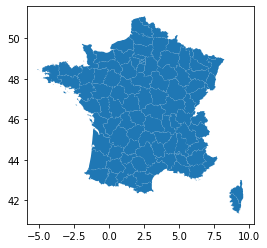

In [ ]:
map_df.plot()

In [ ]:
prenoms = pd.read_csv("dpt2019.csv",sep=";")
prenoms

,sexe,preusuel,annais,dpt,nombre
0,1,_PRENOMS_RARES,1900,02,7
1,1,_PRENOMS_RARES,1900,04,9
2,1,_PRENOMS_RARES,1900,05,8
3,1,_PRENOMS_RARES,1900,06,23
4,1,_PRENOMS_RARES,1900,07,9
...,...,...,...,...,...
794014,1,JEAN-JACQUES,1980,14,5
794015,1,JEAN-JACQUES,1980,20,3
794016,1,JEAN-JACQUES,1980,31,5
794017,1,JEAN-JACQUES,1980,33,4


In [ ]:
dpt_sum = prenoms.groupby("dpt").nombre.sum()
dpt_sum

dpt
01      111219
02      215751
03      130976
04       27857
05       32143
        ...   
971     175561
972     169847
973      57745
974     311807
XX     1708230
Name: nombre, Length: 100, dtype: int64

In [ ]:
type(dpt_sum)

pandas.core.series.Series

In [ ]:
dpt_sum = dpt_sum.reset_index()
dpt_sum

,index,dpt,nombre
0,0,01,111219
1,1,02,215751
2,2,03,130976
3,3,04,27857
4,4,05,32143
...,...,...,...
95,95,971,175561
96,96,972,169847
97,97,973,57745
98,98,974,311807


In [ ]:
type(dpt_sum)

pandas.core.frame.DataFrame

In [ ]:
dpt_sum["code_insee"]= dpt_sum.dpt

In [ ]:
dpt_sum

,index,dpt,nombre,code_insee
0,0,01,111219,01
1,1,02,215751,02
2,2,03,130976,03
3,3,04,27857,04
4,4,05,32143,05
...,...,...,...,...
95,95,971,175561,971
96,96,972,169847,972
97,97,973,57745,973
98,98,974,311807,974


In [ ]:
merged = map_df.merge(dpt_sum,on ="code_insee")

In [ ]:
merged

,code_insee,nom,nuts3,wikipedia,geometry,index,dpt,nombre
0,01,Ain,FR711,b'fr:Ain (d\xe9partement)',"POLYGON ((5.25559 45.78459, 5.23987 45.77758, ...",0,01,111219
1,02,Aisne,FR221,b'fr:Aisne (d\xe9partement)',"POLYGON ((3.48175 48.86640, 3.48647 48.85768, ...",1,02,215751
2,03,Allier,FR721,b'fr:Allier (d\xe9partement)',"POLYGON ((2.38613 46.33196, 2.38407 46.33112, ...",2,03,130976
3,04,Alpes-de-Haute-Provence,FR821,fr:Alpes-de-Haute-Provence,"POLYGON ((6.66579 43.83120, 6.67673 43.83178, ...",3,04,27857
4,05,Hautes-Alpes,FR822,fr:Hautes-Alpes,"POLYGON ((6.24158 44.44686, 6.24411 44.44693, ...",4,05,32143
...,...,...,...,...,...,...,...,...
89,91,Essonne,FR104,b'fr:Essonne (d\xe9partement)',"POLYGON ((2.39233 48.33593, 2.39427 48.33263, ...",90,91,134422
90,92,Hauts-de-Seine,FR105,fr:Hauts-de-Seine,"POLYGON ((2.31993 48.77075, 2.31588 48.76670, ...",91,92,278732
91,93,Seine-Saint-Denis,FR106,fr:Seine-Saint-Denis,"POLYGON ((2.41899 48.84939, 2.41636 48.84924, ...",92,93,241327
92,94,Val-de-Marne,FR107,fr:Val-de-Marne,"POLYGON ((2.41450 48.71780, 2.41320 48.71868, ...",93,94,192403


In [ ]:
nat = pd.read_csv("nat2019.csv",sep=";")

In [ ]:
nat

,sexe,preusuel,annais,nombre
0,1,_PRENOMS_RARES,1900,1250
1,1,_PRENOMS_RARES,1901,1340
2,1,_PRENOMS_RARES,1902,1329
3,1,_PRENOMS_RARES,1903,1285
4,1,_PRENOMS_RARES,1904,1427
...,...,...,...,...
652051,2,ZYNEB,2016,6
652052,2,ZYNEB,2017,6
652053,2,ZYNEB,2018,5
652054,2,ZYNEB,2019,7


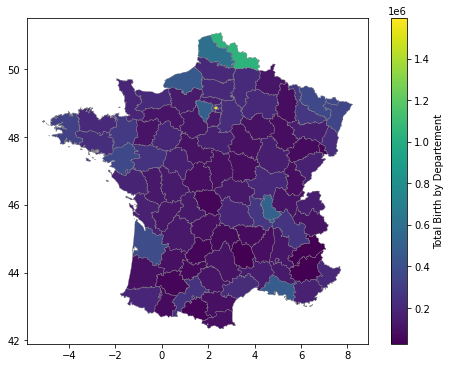

In [ ]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,figsize=(8,6))

merged.plot(column="nombre", ax=ax , linewidth=0.3, edgecolor="0.5", legend=True, legend_kwds
            ={"label": "Total Birth by Departement"})


In [ ]:
nat["sexe"]

0         1
1         1
2         1
3         1
4         1
         ..
652051    2
652052    2
652053    2
652054    2
652055    2
Name: sexe, Length: 652056, dtype: int64